# 단순 선형회귀 - 당뇨병

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import load_diabetes
diabetes=load_diabetes()
df=pd.DataFrame(diabetes.data,columns=diabetes.feature_names)
df['target']=diabetes.target
df.head()
#성별 숫자 이상한 이유? 스케일링 해놔서?

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [9]:
print(diabetes.DESCR)

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

- 10개의 feature와 target 간 상관관계도

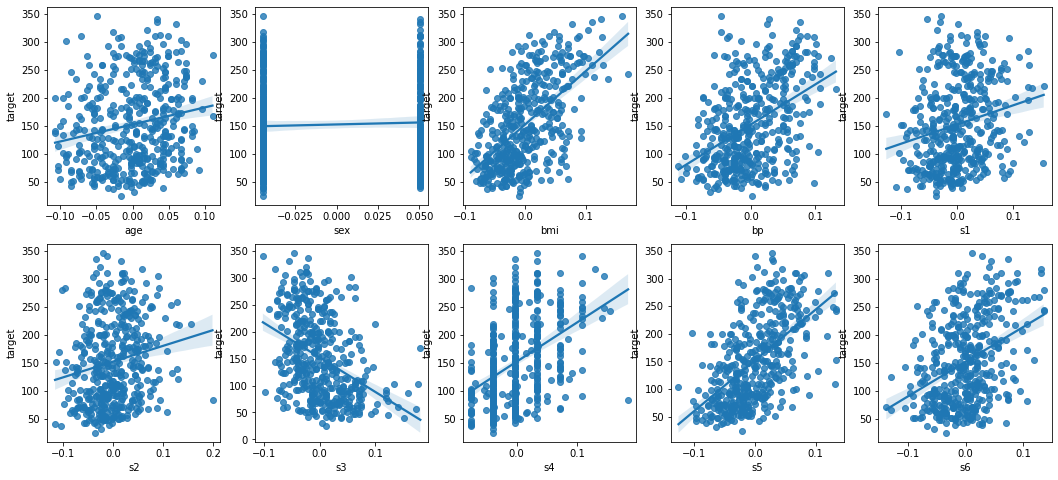

In [6]:
import seaborn as sns
_, axs = plt.subplots(2,5,figsize=(18,8))
for i, feature in enumerate(df.columns[:-1]):
    row,col = i // 5, i % 5
    sns.regplot(x=feature,y='target',data=df,ax=axs[row][col])
#axs 앞의 _는 원래 fig 넣어주기도 하는데 지금 필요없어서 그냥 _로 넣어서 변수 안 만드는 것.

- feature vs target

In [7]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [8]:
for feature in df.columns[:-1]:
    X=df[feature].values.reshape(-1,1)
    lr.fit(X,diabetes.target)
    score=lr.score(X,diabetes.target)
    print(f'{feature}:{score:.4f}')

age:0.0353
sex:0.0019
bmi:0.3439
bp:0.1949
s1:0.0450
s2:0.0303
s3:0.1559
s4:0.1853
s5:0.3202
s6:0.1463


## BMI VS TARGET
- 훈련/테스트 데이터셋 분리(test_size=0.1)

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    df.bmi.values.reshape(-1,1),
    diabetes.target,
    test_size=0.1, 
    random_state=2022
)

X_train.shape, X_test.shape, y_train.shape, y_test.shape 
#회귀라서 계속 연속적인 값이라 stratify 못함. 균등하게 할 수가 없음.

((397, 1), (45, 1), (397,), (45,))

In [13]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [14]:
#계수, 절편, 잔차 제곱의 합
lr.coef_,lr.intercept_,lr._residues

(array([939.55896022]), 151.79247763803028, 1578990.0125372214)

In [15]:
#R squared
from sklearn.metrics import r2_score
pred=lr.predict(X_test)
r2_score(y_test,pred)

0.46955604545525564

In [16]:
#Mean Squared Error
#이것만 가지고는 좋다 나쁘다 알 수 없음. 
#다른 feature랑 비교해봐야 함. 
from sklearn.metrics import mean_squared_error
mse=mean_squared_error(y_test,pred)
rmse=np.sqrt(mse)
mse,rmse

(3127.5719491232653, 55.92469891848561)

- 시각화

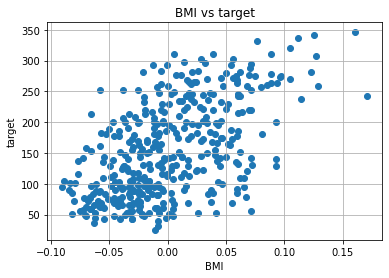

In [17]:
plt.scatter(X_train,y_train)
plt.grid()
plt.xlabel("BMI")
plt.ylabel("target")
plt.title('BMI vs target')
plt.show()

In [19]:
xs=np.array([-0.1,0.18])
ys=xs * lr.coef_+lr.intercept_
ys

array([ 57.83658162, 320.91309048])

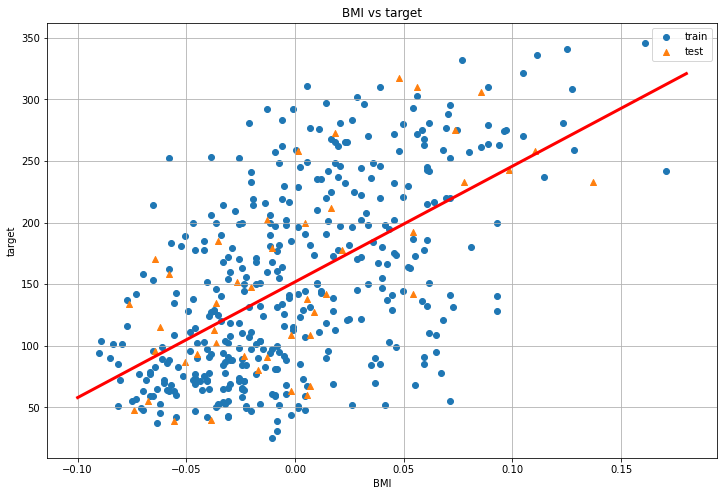

In [27]:
plt.figure(figsize=(12,8))

plt.scatter(X_train,y_train,label='train')
plt.scatter(X_test,y_test,label='test',marker='^')
plt.legend()
plt.plot(xs,ys,'r-',lw=3)
plt.grid()
plt.xlabel("BMI")
plt.ylabel("target")
plt.title('BMI vs target')
plt.show()

In [28]:
### BP vs target
# #Mean Squared/R squared값 비교해보기.
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    df.bp.values.reshape(-1,1),
    diabetes.target,
    test_size=0.1, 
    random_state=2022
)

X_train2.shape, X_test2.shape, y_train2.shape, y_test2.shape 

((397, 1), (45, 1), (397,), (45,))

In [29]:
lr2=LinearRegression()
lr2.fit(X_train2,y_train2)

LinearRegression()

In [32]:
pred2=lr2.predict(X_test2)


In [34]:
lr2.score(X_train2,y_train2)

0.21973845946910642

In [36]:
mean_squared_error(y_test,pred),mean_squared_error(y_test2,pred2)
#MSE값- 작은 게 좋다.
#그래서 gridsearchCV에 적용할 때는 neg_mean_squared_error로 해서 
#큰 수가 좋게끔 만들어준다.

(3127.5719491232653, 6104.276877516169)